# Reconocimiento de Entidades

## Introducción

El reconocimiento de entidades nombradas (NER) es una excelente herramienta para identificar personajes y relaciones en un texto, ya que permite localizar y clasificar entidades como nombres de personas, lugares y organizaciones. Para obtener información más compleja, como relaciones entre personajes, se puede combinar NER con otras técnicas de procesamiento de lenguaje natural.




## 1. Identificación de Personajes (Entidades)
Para identificar los personajes en un texto utilizando NER, puedes seguir los siguientes pasos:

1. **Preprocesamiento del texto**:
   - **Limpieza**: Remueve caracteres especiales, URLs, y elementos que no aporten información (e.g., puntuación innecesaria).
   - **Tokenización**: Divide el texto en oraciones o palabras para facilitar el procesamiento.

2. **Aplicación del Modelo de NER**:
   - Utiliza una herramienta o librería para realizar la identificación de las entidades.
   - Librerías como **spaCy**, **Stanford NER**, o los modelos **Transformers** de Hugging Face (e.g., BERT o BETO para español) son buenas opciones para esta tarea.

   Por ejemplo, con `spaCy` podrías hacer lo siguiente:



In [1]:
!pip install spacy --quiet
!python -m spacy download es_core_news_sm --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 52.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")

In [5]:
# Procesar el texto
texto = "Pablo y Sancho Panza viajaron por La Mancha buscando aventuras."
doc = nlp(texto)

# Identificar y mostrar entidades
for entidad in doc.ents:
  #if entidad.label_ == "PER":  # Filtra solo entidades de tipo 'Persona'
    print(f"Entidad: { entidad.text }, Tipo: { entidad.label_ }")

Entidad: Pablo, Tipo: PER
Entidad: Sancho Panza, Tipo: PER
Entidad: La Mancha, Tipo: LOC



Este script debería identificar "Don Quijote de la Mancha" y "Sancho Panza" como entidades del tipo `PER` (persona), pero identifica únicamente a Sancho Panza.

## 2. Identificación de Relaciones entre Personajes
Para ir más allá y detectar las relaciones entre personajes, puedes utilizar técnicas adicionales, como la extracción de relaciones. Aquí te explico cómo hacerlo:

### 2.1 Análisis de Co-Ocurrencia
Una manera simple de detectar relaciones entre personajes es **analizar la co-ocurrencia** de los nombres dentro de las mismas oraciones o párrafos. Si dos personajes aparecen frecuentemente en la misma oración, es posible que haya una relación significativa entre ellos.

Pasos a seguir:
1. **Dividir el texto en oraciones**.
2. **Detectar personajes en cada oración** utilizando NER.
3. **Registrar las co-ocurrencias**. Si dos personajes aparecen juntos, se establece una relación.

Por ejemplo:

In [6]:
import spacy
from collections import defaultdict

# Cargar modelo en español
nlp = spacy.load("es_core_news_sm")

In [8]:
# Diccionario para registrar relaciones
relaciones = defaultdict(set)

# Procesar el texto
texto = "Don Quijote de la Mancha y Sancho Panza viajaron por La Mancha. Don Quijote era valiente, mientras que Sancho Panza lo acompañaba como su fiel escudero."
doc = nlp(texto)

for sent in doc.sents:  # Iterar sobre oraciones

  # tomar los textos de las entidades del tipo 'persona' o 'miscelaneo'
  personajes = [ent.text for ent in sent.ents if (ent.label_ == "PER" or ent.label_ == "MISC")]

  for i in range(len(personajes)):
    for j in range(i + 1, len(personajes)):
      relaciones[personajes[i]].add(personajes[j])
      relaciones[personajes[j]].add(personajes[i])

# Mostrar las relaciones encontradas
for personaje, relacionados in relaciones.items():
  print(f"{ personaje } está relacionado con { ', '.join(relacionados) }")

Don Quijote de la Mancha está relacionado con Sancho Panza
Sancho Panza está relacionado con Don Quijote, Don Quijote de la Mancha
Don Quijote está relacionado con Sancho Panza



Este script permitirá detectar la co-ocurrencia de personajes en las mismas oraciones, indicando que existe algún tipo de relación entre ellos.

### 2.2 Extracción de Relaciones Usando Dependencias Sintácticas
Otra forma de extraer relaciones entre personajes es utilizar **análisis de dependencias sintácticas**. Esto ayuda a entender el contexto en el que dos entidades aparecen, e incluso a determinar el tipo de relación.

Por ejemplo, si el texto dice: "Don Quijote ayudó a Sancho Panza", se podría extraer que hay una relación de "ayuda" entre Don Quijote y Sancho Panza.

Pasos a seguir:
1. Utiliza una librería como **spaCy** para obtener las dependencias sintácticas de las oraciones.
2. Busca patrones en las dependencias para identificar acciones (verbos) que conecten a las entidades.

Por ejemplo:

In [9]:
# Procesar el texto
doc = nlp("Pablo ayuda a Sancho Panza en su aventura.")

# Identificar y mostrar entidades
for entidad in doc.ents:
  #if entidad.label_ == "PER":  # Filtra solo entidades de tipo 'Persona'
    print(f"Entidad: { entidad.text }, Tipo: { entidad.label_ }")

Entidad: Pablo, Tipo: PER
Entidad: Sancho Panza, Tipo: PER


In [10]:
# Buscar relaciones a través de verbos
for token in doc:
  if token.pos_ == "VERB":                                    # buscar verbos
    sujeto = [w for w in token.children if w.dep_ == "nsubj"] # sujeto del verbo
    objeto = [w for w in token.children if w.dep_ == "dobj"]  # objeto del verbo
    if sujeto and objeto:
      print(f"{ sujeto[0].text } { token.text } { objeto[0].text }")


Este script buscará relaciones explícitas expresadas mediante verbos en las oraciones, lo cual proporciona una forma más profunda de analizar la conexión entre personajes.


## 3. Representación de Relaciones

Una vez que hayas identificado los personajes y sus relaciones, puedes **visualizar estas relaciones** utilizando una red de grafos. Para esto, puedes usar una herramienta como **NetworkX** en Python:

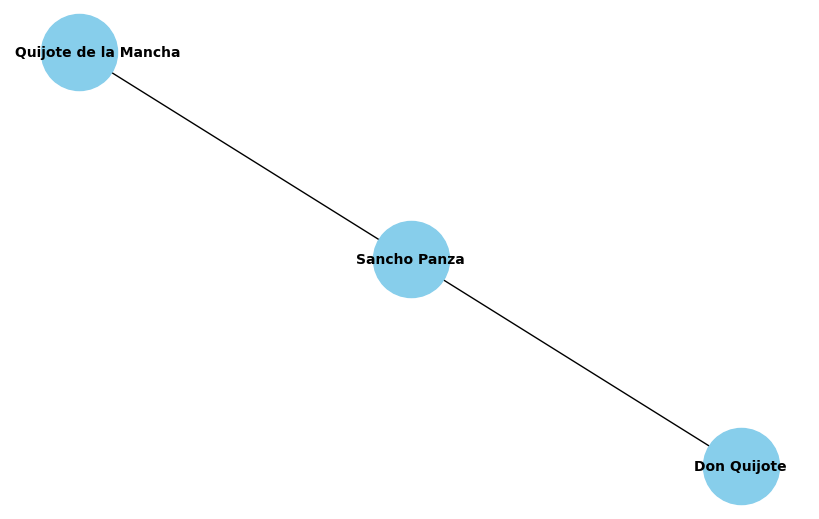

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Crear un grafo
G = nx.Graph()

# Agregar nodos (personajes)
for personaje in relaciones:
  G.add_node(personaje)

# Agregar aristas (relaciones)
for personaje, relacionados in relaciones.items():
  for relacionado in relacionados:
    G.add_edge(personaje, relacionado)

# Dibujar el grafo
plt.figure(figsize=(8, 5))
nx.draw(G, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold")
plt.show()


Este grafo ayudará a visualizar qué personajes están relacionados entre sí y cómo se conectan en la narrativa.


# Usando Transformers

## Objetivo del Tutorial
El objetivo es enseñar cómo usar **Transformers** de Hugging Face para realizar tareas de reconocimiento de entidades nombradas (NER) en textos en español.

### Paso 1: Preparación del Entorno

Primero, debemos configurar el entorno de Google Colab. Asegúrate de tener instalado `transformers` y `datasets`, dos librerías fundamentales para trabajar con modelos de Transformers y datos.

Ejecuta el siguiente código en Google Colab para instalar las dependencias necesarias:

In [12]:
!pip install transformers datasets --quiet

### Paso 2: Importar Librerías

Importemos las librerías necesarias para trabajar con el modelo y preparar nuestro texto:

In [13]:
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

### Paso 3: Cargar el Modelo BETO para NER

Utilizaremos el modelo **BETO**, que es un modelo BERT entrenado específicamente en español. BETO tiene una versión para clasificación de entidades (`d4data/beto-finetuned-ner`) que usaremos para identificar entidades nombradas.

Cargamos el modelo y el tokenizador asociado:


In [14]:
# Nombre del modelo entrenado para NER en español
modelo_ner = "mrm8488/bert-spanish-cased-finetuned-ner"

# Cargar el tokenizador y el modelo para NER
tokenizer = AutoTokenizer.from_pretrained(modelo_ner)
model = AutoModelForTokenClassification.from_pretrained(modelo_ner)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Some weights of the model checkpoint at mrm8488/bert-spanish-cased-finetuned-ner were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Paso 4: Crear un Pipeline para NER

Para facilitar el uso del modelo y el tokenizador, utilizaremos un `pipeline` de Hugging Face para el reconocimiento de entidades nombradas.


In [16]:
# Crear el pipeline de NER
nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

Device set to use cpu


La opción `aggregation_strategy="simple"` permite que el pipeline agrupe automáticamente las entidades que corresponden a un mismo nombre (por ejemplo, las palabras de un nombre compuesto).

### Paso 5: Probar el Pipeline con un Texto en Español

Definimos un texto en español para probar nuestro pipeline. Puedes cambiar el texto según tus necesidades.


In [31]:
# Texto para probar el reconocimiento de entidades
texto = """
Don Quijote de la Mancha y Sancho Panza viajaron juntos en busca de aventuras.
Cervantes escribió este libro en España, donde describe sus aventuras en la región de La Mancha.
En el camino se encontraron con muchos personajes, incluyendo al Duque y a la Duquesa.
"""

# Aplicar el modelo de NER al texto
entidades = nlp_ner(texto)

# Imprimir los resultados
for entidad in entidades:
  print(f"Entidad: { entidad['word'] }, Tipo: { entidad['entity_group'] }, Score: {entidad['score']:.2f}")

Entidad: Don Quijote de la Mancha, Tipo: PER, Score: 0.99
Entidad: Sancho Panza, Tipo: PER, Score: 1.00
Entidad: Cervantes, Tipo: PER, Score: 0.96
Entidad: España, Tipo: LOC, Score: 1.00
Entidad: La Mancha, Tipo: LOC, Score: 1.00
Entidad: Duque, Tipo: PER, Score: 1.00
Entidad: Duquesa, Tipo: PER, Score: 0.76


### Paso 6: Interpretar los Resultados

El pipeline devuelve una lista de diccionarios, donde cada diccionario contiene:

- **`word`**: El fragmento del texto identificado como una entidad.
- **`entity_group`**: El tipo de entidad reconocida, que puede ser una persona (`PER`), un lugar (`LOC`), una organización (`ORG`), o una fecha, cantidad, etc.
- **`score`**: La confianza del modelo en la predicción.

#### Ejemplo de Salida
Después de ejecutar el pipeline, deberías obtener un resultado similar al siguiente:

```
Entidad: Don Quijote de la Mancha, Tipo: PER, Score: 0.98
Entidad: Sancho Panza, Tipo: PER, Score: 0.99
Entidad: Cervantes, Tipo: PER, Score: 0.98
Entidad: España, Tipo: LOC, Score: 0.97
Entidad: La Mancha, Tipo: LOC, Score: 0.95
Entidad: Duque, Tipo: PER, Score: 0.85
Entidad: Duquesa, Tipo: PER, Score: 0.87
```

### Paso 7: Visualización de Resultados

Para visualizar las entidades identificadas dentro del texto, podemos usar una librería de visualización simple como **Matplotlib** para resaltar las entidades en colores.

In [33]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Crear un HTML para resaltar las entidades
html_text = texto

# Resaltar entidades en el texto
for entidad in entidades:
  palabra = entidad['word']
  tipo = entidad['entity_group']
  score = entidad['score']
  color = "#ffd700" if tipo == "PER" else "#add8e6" if tipo == "LOC" else "#90ee90"
  html_text = html_text.replace(palabra, f"<mark style='background-color:{ color }'>{ palabra } ({ tipo })</mark>")

# Mostrar el texto resaltado
display(HTML(f"<p>{ html_text }</p>"))

### Paso 8: Extensiones y Mejora

Este tutorial te proporciona una base para aplicar NER utilizando Transformers y BETO.

A partir de aquí, puedes realizar otras mejoras y extensiones, como:

1. **Procesar Documentos Complejos**: Puedes cargar archivos de texto o PDF y aplicar el pipeline a los documentos.
2. **Entrenar tu Propio Modelo**: Si necesitas una mejor adaptación a un corpus específico, podrías considerar entrenar tu propio modelo utilizando `transformers` y `datasets`.
3. **Aplicaciones Específicas**: Utiliza los resultados de NER en aplicaciones como análisis de opiniones, extracción de información, o análisis de redes entre personajes.


### Conclusión
En este tutorial has aprendido a usar **Transformers** en Google Colab para realizar reconocimiento de entidades nombradas (NER) sobre textos en español, utilizando el modelo **BETO**. Aprovechar los Transformers y el poder de Hugging Face te permite realizar esta tarea de manera efectiva y con una precisión competitiva en textos complejos y multilingües.

Este pipeline es una herramienta poderosa para trabajar con datos textuales y puede adaptarse a múltiples tareas, ayudándote a explorar y analizar texto en el idioma español de manera profunda y precisa.